## Common Data Types

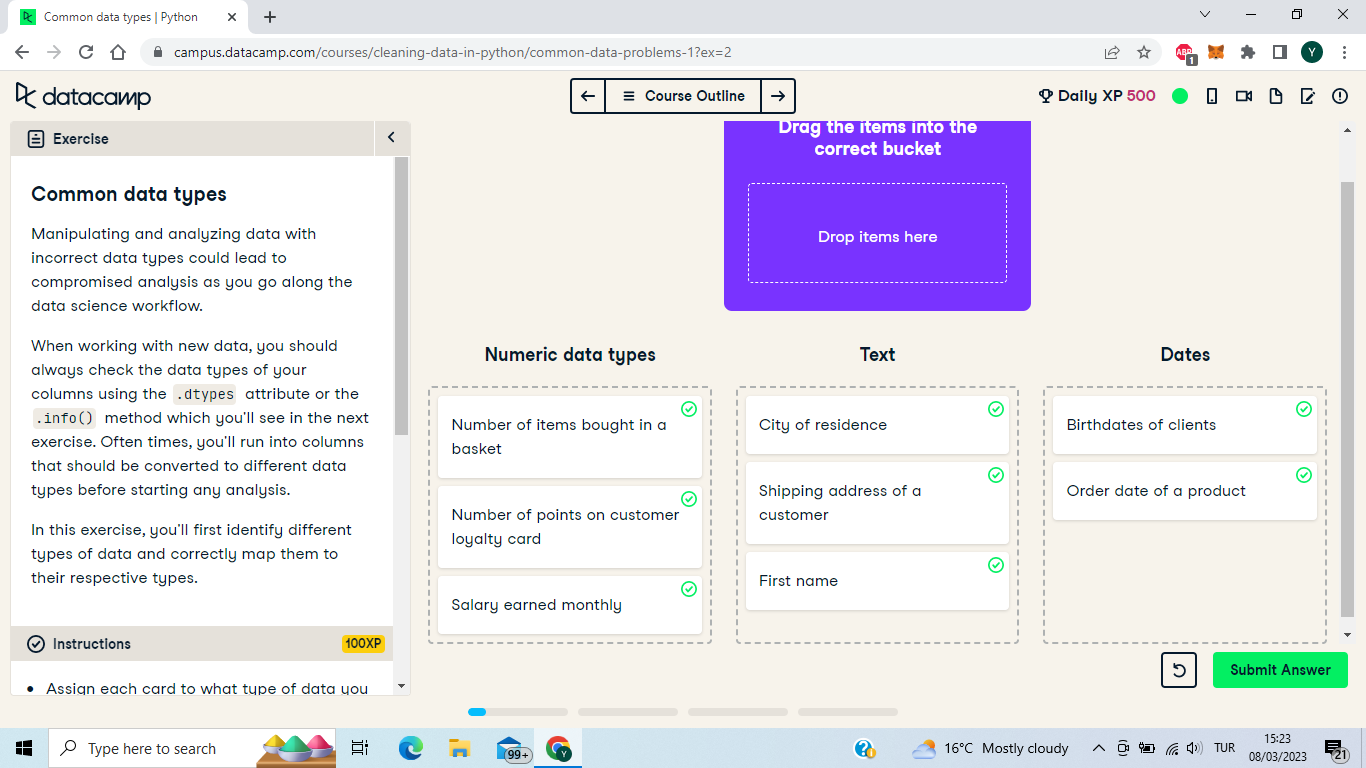

Awesome! Correctly identifying what type your data is is one of the easiest ways to avoid hampering your analysis due to data type constraints in the long run.

#### Numeric data or ... ?
In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called ride_sharing. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The user_type column contains information on whether a user is taking a free ride and takes on the following values:

1 for free riders.
2 for pay per ride.
3 for monthly subscribers.
In this instance, you will print the information of ride_sharing using .info() and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The pandas package is imported as pd.

In [10]:
import pandas as pd
import numpy as np

ride_sharing = pd.read_csv("ride_sharing_new.csv")
ride_sharing


,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,26
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,27
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,26
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4,27
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male,1,11,11,27
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male,2,10,10,27
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male,2,14,14,27
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male,2,14,14,27


In [11]:
# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
 10  user_type_cat    25760 non-null  int64 
 11  duration_trim    25760 non-null  int64 
 12  duration_time    25760 non-null  int64 
 13  tire_sizes       25760 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 2.8+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%  

#### Question
By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?


a.The user_type column is not of the correct type, it should be converted to str.<br>
b.The user_type column has an infinite set of possible values, it should be converted to category.<br>
<strong>c.The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.</strong>

In [18]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype("category")

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


Awesome work! Take a look at the new summary statistics, it seems that most users are pay per ride users!

#### Summing strings and concatenating numbers
In the previous exercise, you were able to identify that category is the correct data type for user_type and convert it in order to extract relevant statistical summaries that shed light on the distribution of user_type.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column duration to the type int. Before that however, you will need to make sure to strip "minutes" from the column in order to make sure pandas reads it as numerical. The pandas package has been imported as pd.

In [22]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype("int")

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']],"\n\n")
print(ride_sharing[['duration','duration_trim','duration_time']].info(),"\n")
print("Mean:", ride_sharing["duration_time"].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   duration       25760 non-null  object
 1   duration_trim  25760 non-null  object
 2   duration_time  25760 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 603.9+ KB
None 

Mean: 11.389052795031056


Great work! 11 minutes is really not bad for an average ride duration in a city like San-Francisco. In the next lesson, you're going to jump right ahead into sanity checking the range of values in your data.

## Data range constraints
#### Tire size constraints
In this lesson, you're going to build on top of the work you've been doing with the ride_sharing DataFrame. You'll be working with the tire_sizes column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

In [14]:
# importing random package to assign random values to the column 'tire_sizes'
import random

# since 'tire_sizes' column doesn't exist, we create and assign random string values.
# if we didn't specify 'size' parameter, unique value would show 1 so this is highly important. 
ride_sharing['tire_sizes'] = np.random.choice(["26", "27", "29"], p=[0.3, 0.3, 0.4], size = len(ride_sharing), replace = True) 

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing["tire_sizes"] > 27, "tire_sizes"] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing["tire_sizes"].astype("category")

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

ride_sharing.to_csv('ride_sharing_new.csv', index=False)

count     25760
unique        2
top          27
freq      17935
Name: tire_sizes, dtype: int64


Awesome work! You can look at the new maximum by looking at the top row in the description. Notice how essential it was to convert tire_sizes into integer before setting a new maximum.

#### Back to the future
A new update to the data pipeline feeding into the ride_sharing DataFrame has been updated to register each ride's date. This information is stored in the ride_date column of the type object, which represents strings in pandas.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the ride_date column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert ride_date to a datetime object.

The datetime package has been imported as dt, alongside all the packages you've been using till now

In [15]:
import datetime as dt

# Since there is no 'ride_date' column in dataframe, I had to write a function to generate random dates.
def random_dates(start, end, n):
    ''' produce random dates'''

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')


start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2025-01-01')
ride_sharing['ride_date'] = random_dates(start, end, n = len(ride_sharing))

##############################################################################

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

ride_sharing

2024-06-22


,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat,duration_trim,duration_time,tire_sizes,ride_date,ride_dt
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2,12,12,26,2017-02-26 02:52:03,2017-02-26
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2,24,24,27,2018-11-24 12:56:44,2018-11-24
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3,8,8,27,2021-09-18 12:56:39,2021-09-18
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1,4,4,27,2020-04-11 06:25:26,2020-04-11
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2,11,11,27,2017-11-08 07:01:14,2017-11-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male,1,11,11,27,2017-08-10 10:37:04,2017-08-10
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male,2,10,10,27,2024-05-14 15:45:11,2024-05-14
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male,2,14,14,27,2024-02-12 11:46:14,2024-02-12
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male,2,14,14,26,2018-08-11 13:53:12,2018-08-11


Great job! Imagine counting the number of rides taken today without having cleaned your ranges correctly. You would have wildly underreported your findings!

## Uniqueness constraints

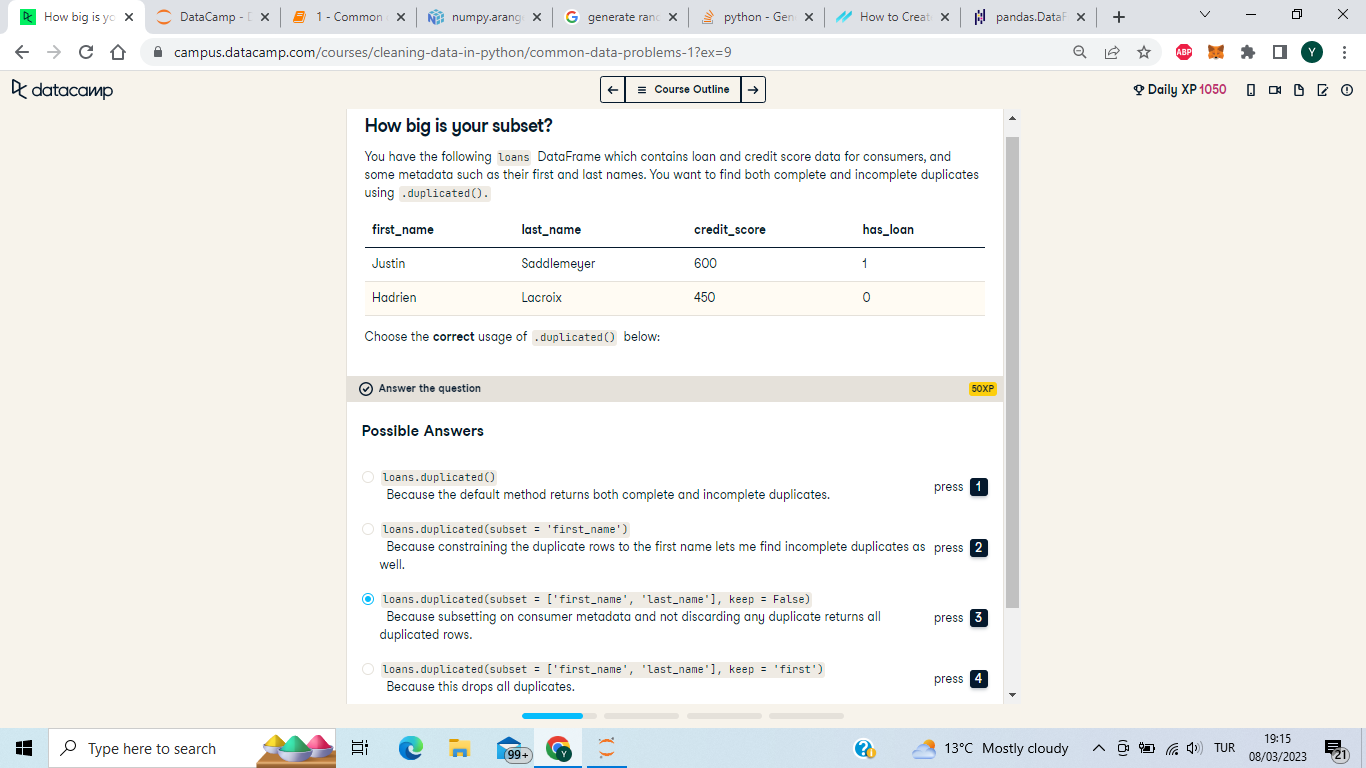

Correct! Subsetting on metadata and keeping all duplicate records gives you a better bird-eye's view over your data and how to duplicate it! You can even subset the <strong>loans</strong> DataFrame using bracketing and sort the values so you can properly identify the duplicates.

#### Finding duplicates
A new update to the data pipeline feeding into ride_sharing has added the ride_id column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the ride_sharing DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of ride_sharing is in your environment, as well as all the packages you've been working with thus far.

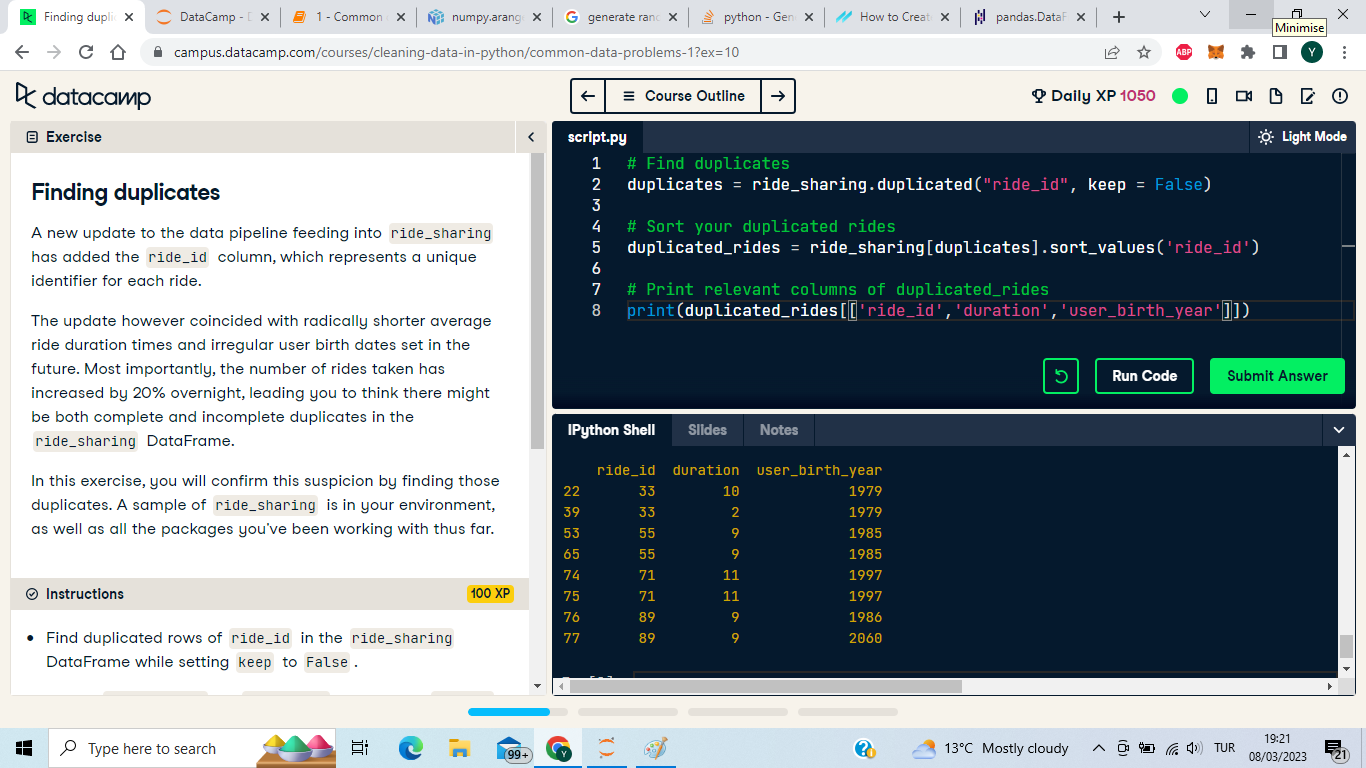

Great job! Notice that rides 33 and 89 are incomplete duplicates, whereas the remaining are complete. You'll learn how to treat them in the next exercise!

#### Treating duplicates

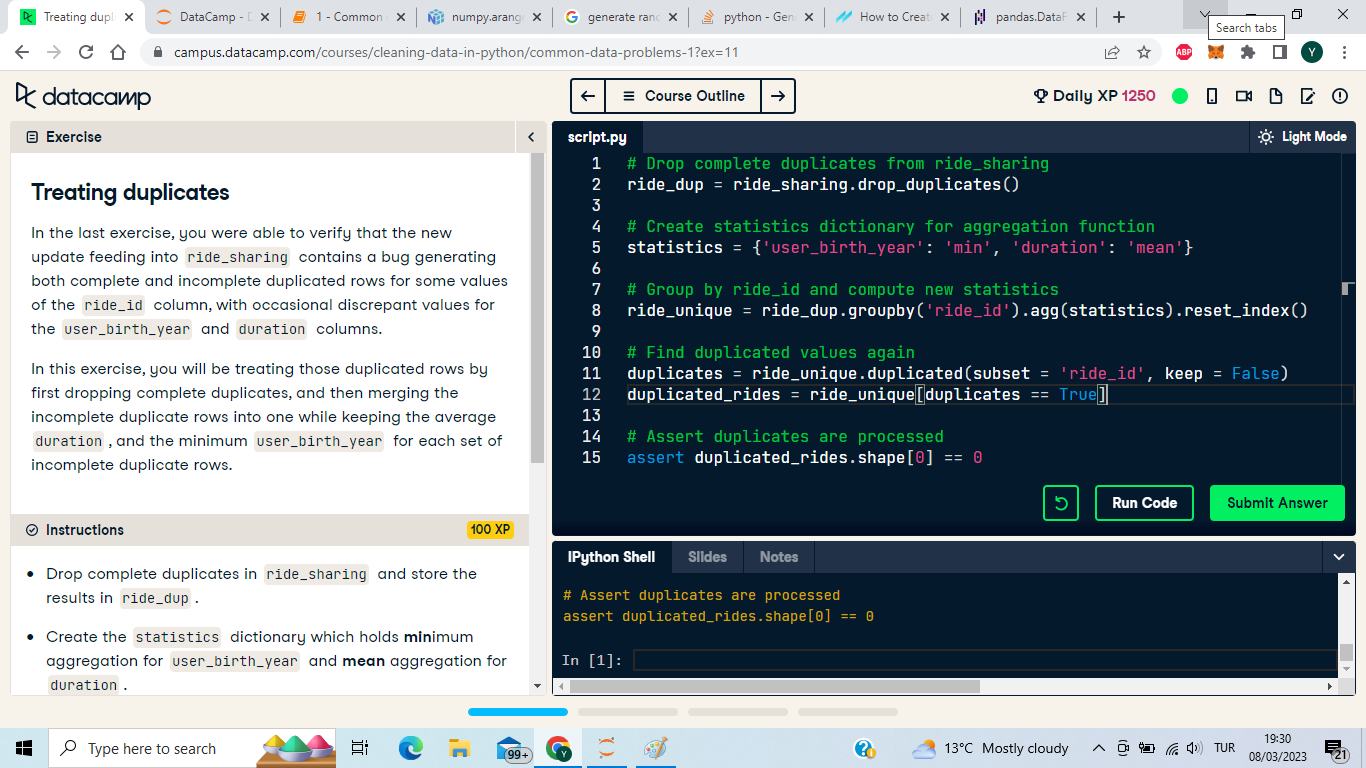

Awesome work! You can bet after this fix that ride sharing KPIs will come back to normal.

In [44]:
import pandas as pd

# Örnek DataFrame oluşturalım
data = {
    'ride_id': [1, 2, 3, 3, 4, 5],
    'duration': ['10 minutes', '15 minutes', '20 minutes', '20 minutes', '12 minutes', '18 minutes'],
    'user_id': [101, 102, 103, 103, 104, 105]
}
df = pd.DataFrame(data)
print(df,"\n\n")

# ride_id'ye göre yinelenen satırları bulalım
duplicate_rows = df[df.duplicated(subset=['ride_id'], keep=False)]
print("Yinelenen satırlar:")
print(duplicate_rows, "\n\n")

## CHECKING AND CONFIRMING IF THERE IS ANY DUPLICATED VALUE
df.drop_duplicates(duplicate_rows,inplace = True)
checked_duplicates = df.duplicated("ride_id", keep=False) 
duplicated_rides = df[checked_duplicates] == True
duplicated_rides

   ride_id    duration  user_id
0        1  10 minutes      101
1        2  15 minutes      102
2        3  20 minutes      103
3        3  20 minutes      103
4        4  12 minutes      104
5        5  18 minutes      105 


Yinelenen satırlar:
   ride_id    duration  user_id
2        3  20 minutes      103
3        3  20 minutes      103 




,ride_id,duration,user_id
